In [1]:
#import spark
from pyspark.sql import SparkSession
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 ass2 BNPL group 28")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

22/09/13 20:18:44 WARN Utils: Your hostname, Rudyletsgo resolves to a loopback address: 127.0.1.1; using 172.25.148.241 instead (on interface eth0)
22/09/13 20:18:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/09/13 20:18:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
curated_csv = spark.read.options(header = True).csv('../data/curated/full_data.csv')

In [3]:
curated_csv.limit(5)
print(curated_csv.count(),len(curated_csv.columns))

14195505 15


In [4]:
from pyspark.sql.functions import col,isnan, when, count
curated_csv.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in curated_csv.columns]
   ).show()

+-------+------------+------------+--------+--------------+-----------+-------------+---------+-------+-----+--------+------+------+-------------+---------+
|user_id|merchant_abn|dollar_value|order_id|order_datetime|consumer_id|merchant_name|user_name|address|state|postcode|gender| field|revenue_level|take_rate|
+-------+------------+------------+--------+--------------+-----------+-------------+---------+-------+-----+--------+------+------+-------------+---------+
|      0|           0|           0|       0|             0|          0|       580830|        0|      0|    0|       0|     0|580830|       580830|   580830|
+-------+------------+------------+--------+--------------+-----------+-------------+---------+-------+-----+--------+------+------+-------------+---------+



In [5]:
cols = ['address','gender']
#curated_csv2 = curated_csv.drop(curated_csv.address)
curated_csv3 = curated_csv.drop(*cols)
#curated_csv4 = curated_csv3.drop(curated_csv.user_name)
curated_csv3.limit(5)
print(curated_csv3.count(),len(curated_csv3.columns))

14195505 13


In [6]:
# check null value
curated_csv3 = curated_csv3.dropna()
print(curated_csv3.count(),len(curated_csv3.columns))

13614675 13


Check there are no duplicate order

In [7]:
curated_csv4 = curated_csv3.distinct()

In [8]:
curated_csv3.limit(5)

user_id,merchant_abn,dollar_value,order_id,order_datetime,consumer_id,merchant_name,user_name,state,postcode,field,revenue_level,take_rate
19087,97861055416,120.24,5dbcd6ea-38eb-4e6...,2021-08-20,5538,Morbi Neque Inc.,Alexandra Davis,QLD,4417,"computers, comput...",b,3.4
19087,80324045558,2.59,d6d96882-257f-43e...,2022-06-26,5538,Ipsum Dolor Sit C...,Alexandra Davis,QLD,4417,"gift, card, novel...",c,1.47
19087,86578477987,72.29,e6afee18-ee2b-447...,2021-08-20,5538,Leo In Consulting,Alexandra Davis,QLD,4417,"watch, clock, and...",a,6.43
19087,43186523025,52.41,7fbd7162-14a0-4fa...,2022-06-26,5538,Lorem Ipsum Sodal...,Alexandra Davis,QLD,4417,florists supplies...,b,4.47
19087,29936037423,29.5,d7e18a71-5e10-4e0...,2021-08-19,5538,Sodales Incorporated,Alexandra Davis,QLD,4417,"hobby, toy and ga...",c,1.97


In [9]:
curated_csv3.where(curated_csv3['consumer_id']==5538)

user_id,merchant_abn,dollar_value,order_id,order_datetime,consumer_id,merchant_name,user_name,state,postcode,field,revenue_level,take_rate
19087,97861055416,120.24,5dbcd6ea-38eb-4e6...,2021-08-20,5538,Morbi Neque Inc.,Alexandra Davis,QLD,4417,"computers, comput...",b,3.4
19087,80324045558,2.59,d6d96882-257f-43e...,2022-06-26,5538,Ipsum Dolor Sit C...,Alexandra Davis,QLD,4417,"gift, card, novel...",c,1.47
19087,86578477987,72.29,e6afee18-ee2b-447...,2021-08-20,5538,Leo In Consulting,Alexandra Davis,QLD,4417,"watch, clock, and...",a,6.43
19087,43186523025,52.41,7fbd7162-14a0-4fa...,2022-06-26,5538,Lorem Ipsum Sodal...,Alexandra Davis,QLD,4417,florists supplies...,b,4.47
19087,29936037423,29.5,d7e18a71-5e10-4e0...,2021-08-19,5538,Sodales Incorporated,Alexandra Davis,QLD,4417,"hobby, toy and ga...",c,1.97
19087,89536028092,48.22,12f42311-ba43-497...,2022-06-26,5538,Mauris Rhoncus LLC,Alexandra Davis,QLD,4417,"computers, comput...",a,6.1
19087,43061683632,18.12,19511b77-2d85-402...,2021-08-19,5538,A Facilisis PC,Alexandra Davis,QLD,4417,"watch, clock, and...",c,2.73
19087,83323591742,286.8,ffc9ff6d-7c45-434...,2022-07-24,5538,Eget Dictum Limited,Alexandra Davis,QLD,4417,florists supplies...,b,4.18
19087,45629217853,21.11,1b29ade5-b0cd-47f...,2021-08-19,5538,Lacus Consulting,Alexandra Davis,QLD,4417,"gift, card, novel...",a,6.98
19087,81578465750,20.83,3ca9faf1-69df-47a...,2022-06-27,5538,Nec Cursus PC,Alexandra Davis,QLD,4417,"cable, satellite,...",c,1.43


In [10]:
# check wrong data
from os import curdir
from pyspark.sql import functions as F
new_data = curated_csv3.filter(
    (F.col('user_id') > 0 )
    & (F.col('dollar_value') >= 0)
    & (F.col('consumer_id') > 0)
    & (F.col('postcode') > 0)
)
print(new_data.count(),len(new_data.columns))

13614675 13


In [11]:
new_data.limit(5)

user_id,merchant_abn,dollar_value,order_id,order_datetime,consumer_id,merchant_name,user_name,state,postcode,field,revenue_level,take_rate
19087,97861055416,120.24,5dbcd6ea-38eb-4e6...,2021-08-20,5538,Morbi Neque Inc.,Alexandra Davis,QLD,4417,"computers, comput...",b,3.4
19087,80324045558,2.59,d6d96882-257f-43e...,2022-06-26,5538,Ipsum Dolor Sit C...,Alexandra Davis,QLD,4417,"gift, card, novel...",c,1.47
19087,86578477987,72.29,e6afee18-ee2b-447...,2021-08-20,5538,Leo In Consulting,Alexandra Davis,QLD,4417,"watch, clock, and...",a,6.43
19087,43186523025,52.41,7fbd7162-14a0-4fa...,2022-06-26,5538,Lorem Ipsum Sodal...,Alexandra Davis,QLD,4417,florists supplies...,b,4.47
19087,29936037423,29.5,d7e18a71-5e10-4e0...,2021-08-19,5538,Sodales Incorporated,Alexandra Davis,QLD,4417,"hobby, toy and ga...",c,1.97


Feature (state) check

In [12]:
# this is the count of state, no need to filter
new_data.groupBy(new_data['state']).count()

state,count
NT,193967
ACT,124972
SA,1547006
TAS,504569
WA,2155279
QLD,2014613
VIC,3146464
NSW,3927805


Feature(revenue_level) check

In [13]:
# count of different revenue level, no need to filter
new_data.groupBy(new_data['revenue_level']).count()

revenue_level,count
e,120108
d,136838
c,3324800
b,3921368
a,6111561


Feature(take_rate) check

In [14]:
new_data.select('take_rate').describe()

summary,take_rate
count,13614675
mean,4.5888869635142635
stddev,1.7384891977570738
min,0.1
max,7.0


In [15]:
# check dollar
import matplotlib.pyplot as plt
# check outliers
a = new_data.sample(0.5).select('take_rate')

In [16]:
a = a.toPandas()


In [17]:
a['take_rate']=a['take_rate'].astype(float)

<AxesSubplot:>

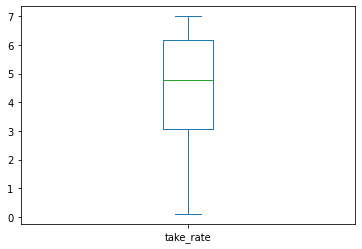

In [18]:
a.plot.box()

Feature(date) check, remove the transactions are not in selected time range

In [19]:
# check the order datetime
from pyspark.sql import functions as F
new_df = new_data.filter(
    (F.col('order_datetime') >= '2021-02-28') 
    & (F.col('order_datetime') <= '2022-08-28')
)

print(new_df.count(),len(new_df.columns))

12047317 13


In [20]:
new_df.select('postcode').describe()
#new_df.limit(5)

summary,postcode
count,12047317
mean,4043.344625778503
stddev,1780.6993191675258
min,1001
max,9999


In [21]:
# check postcode
new_df = new_df.withColumn("length_of_str",F.length('postcode'))
new_df.select('length_of_str').describe()
new_df = new_df.filter(
    (F.col('length_of_str') <= 4)
    & (F.col('length_of_str') >=3)
)
new_df = new_df.drop('length_of_str')
print(new_df.count(),len(new_df.columns))

12047317 13


In [22]:
new_df.select('postcode').describe()

summary,postcode
count,12047317
mean,4043.344625778503
stddev,1780.6993191675258
min,1001
max,9999


In [23]:
# check postcode
new_df = new_df.withColumn("length_of_str",F.length('postcode'))
new_df.select('length_of_str').describe()
new_df = new_df.filter(
    (F.col('length_of_str') == 4)
    #&(F.col('length_of_str') >=3 )
)
new_df = new_df.drop('length_of_str')
print(new_df.count(),len(new_df.columns))

11873781 13


In [24]:
new_df.select('postcode').describe()

summary,postcode
count,11873781
mean,4090.160012720464
stddev,1750.7133070801758
min,1001
max,9999


In [25]:
curated_csv3.count()

13614675

In [26]:
curated_csv4.count()